In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## 1)Преобразуйте данные

### a)Проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости

In [3]:
data.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [4]:
data = data.fillna(0)
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11538 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


### b)Закодируйте категориальные переменные числовыми значениями по необходимости.

In [6]:
X = pd.get_dummies(data[['nationality', 'height', 'weight', 'sport', "gold", "silver", "bronze"]], columns=['nationality', 'sport'], dtype='int', drop_first=True)
X

,height,weight,gold,silver,bronze,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,1.73,63.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,1.85,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11536,1.60,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
le = LabelEncoder()
le.fit(data['sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [8]:
Y = pd.Series(le.transform(data['sex']))
Y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

## 2)Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## 3)Постройте ROC-кривую с помощью функции roc_curve из библиотеки sklearn.metrics

In [11]:
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

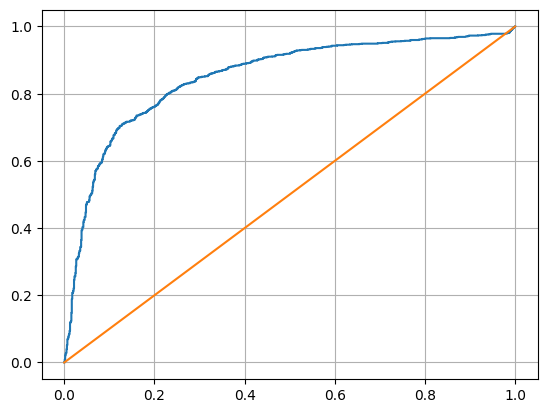

In [12]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.grid()

## 4)Вычислите значение ROC-AUC метрики с помощью функции roc_auc_score из библиотеки sklearn.metrics

In [13]:
roc_auc_score(Y_test, predictions[:, 1])

np.float64(0.8494908781542589)

## 5)Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn

In [14]:
def roc_curve(y_true, y_prob, thresholds):

    fpr = []
    tpr = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return [fpr, tpr]

In [15]:
fpr2, tpr2 = roc_curve(Y_test, predictions[:, 1], thres)

## 6)Постройте ROC-кривую с помощью вычисленных в п. 5 метрик. Объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

Text(0.5, 1.0, 'Вручную')

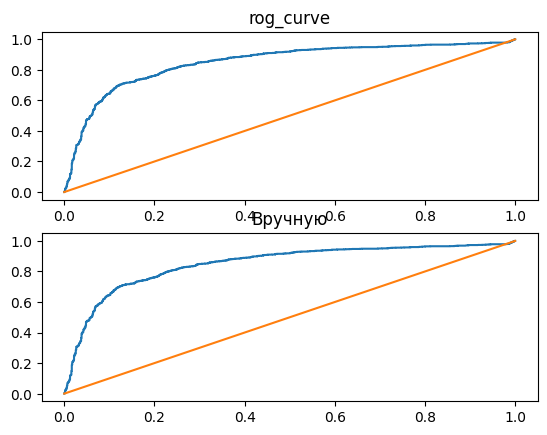

In [16]:
figure, axis = plt.subplots(2)

axis[0].plot(fpr, tpr)
axis[0].plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
axis[0].set_title("rog_curve")

axis[1].plot(fpr2, tpr2)
axis[1].plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
axis[1].set_title("Вручную")


Как мы видим, оба графика практически равны

## 7)Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

In [17]:
def prec_rec(y_true, y_prob, thresholds):

    precision = []
    recall = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        precision.append(tp / (tp + fp))
        recall.append(tp / (tp + fn))
    
    return [precision, tpr]

C:\Users\lipatov\AppData\Local\Temp\ipykernel_1352\2753763846.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(tp / (tp + fp))


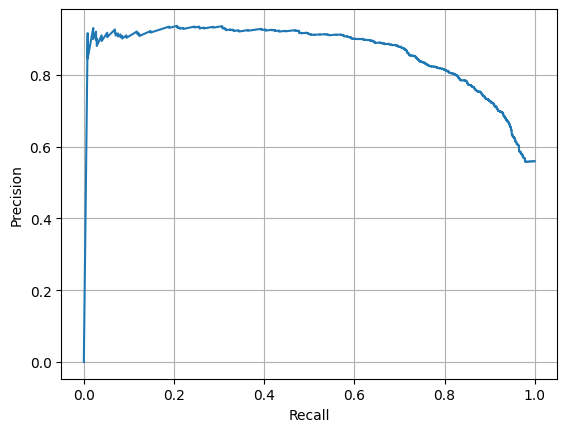

In [18]:
precision, recall = prec_rec(Y_test, predictions[:, 1], thres)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()

## 9)Сформулируйте выводы по проделанной работе

Мы видим, что модель предсказывает достаточно хорошо. А так же из графиков мы можем сделать вывод, что самый оптимальный порог будет в 0.5